In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import brier_score_loss, confusion_matrix, classification_report, average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from catboost import CatBoostClassifier
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBClassifier
from statistics import mean
from sklearn import model_selection

from warnings import filterwarnings
filterwarnings('ignore')

# Data Overwiev

In [2]:
df = pd.read_csv("datafm20.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,...,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,...,14,4,1,16,14,18,13,6,2,15
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,...,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,...,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,...,17,3,1,14,14,16,18,10,4,17


In [4]:
df=df.iloc[:, 1:]

In [5]:
df.columns

Index(['Name', 'Position', 'Club', 'Division', 'Based', 'Nation', 'Height',
       'Weight', 'Age', 'Preferred Foot', 'Best Pos', 'Best Role', 'Value',
       'Wage', 'CA', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str',
       'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB',
       'Nat', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre',
       'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt',
       'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

In [6]:
# Dropping unnecessary columns

df.drop(columns=["Position", "Based", "Nation", "Best Role", "Value", "Wage", "L Th"], inplace=True)

df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,Barcelona,Spanish First Division,170,72,32,Left,AM (R),195,200,...,18,2,2,10,19,19,19,7,2,18
1,Cristiano Ronaldo,Juventus,Italian Serie A,185,83,34,Either,ST (C),195,196,...,14,4,1,16,14,18,13,6,2,15
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,18,2,1,12,14,17,16,6,4,20
3,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,20,12,17,14,14,19,15,8,14,13
4,Neymar,Paris SG,Ligue 1 Conforama,175,68,27,Right,AM (L),186,190,...,17,3,1,14,14,16,18,10,4,17


In [7]:
''' 
If the players current ability is less than 100 we will not use it in our models. 
Because generally we can inference whether the players  current ability is greater than 100 to look at his profile.

And same for potential ability

'''

df = df[df["PA"]>130]

df = df[df["CA"]>100]

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,Barcelona,Spanish First Division,170,72,32,Left,AM (R),195,200,...,18,2,2,10,19,19,19,7,2,18
1,Cristiano Ronaldo,Juventus,Italian Serie A,185,83,34,Either,ST (C),195,196,...,14,4,1,16,14,18,13,6,2,15
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,18,2,1,12,14,17,16,6,4,20
3,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,20,12,17,14,14,19,15,8,14,13
4,Neymar,Paris SG,Ligue 1 Conforama,175,68,27,Right,AM (L),186,190,...,17,3,1,14,14,16,18,10,4,17


In [10]:
df["P_Quality"] = df["PA"]

In [11]:
'''
We encoded player as high level player if his potential ability bigger than 150 else we encoded low level player.

'''

for i in range(len(df)):
    if df["PA"][i]>=150:
        df["P_Quality"][i]="High_Level"
    else:
        df["P_Quality"][i]="Low_Level"

In [12]:
'''

We encoded player as high level player if his current ability bigger than 125 else we encoded low level player.

'''

df["C_Quality"] = df["CA"]

for i in range(len(df)):
    if df["CA"][i]>=125:
        df["C_Quality"][i]="High_Level"
    else:
        df["C_Quality"][i]="Low_Level"

In [13]:
# P_Quality-C_Quality Low:0 High:1

df['P_Quality'].loc[df['P_Quality'] == 'Low_Level'] = 0
df['C_Quality'].loc[df['C_Quality'] == 'High_Level'] = 1
df['P_Quality'].loc[df['P_Quality'] == 'High_Level'] = 1
df['C_Quality'].loc[df['C_Quality'] == 'Low_Level'] = 0

In [14]:
df.sample(5)

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality
970,Andrej Kramaric,TSG Hoffenheim,Bundesliga,177,73,28,Either,ST (C),147,152,...,1,9,9,15,16,13,2,14,1,1
1632,MÃ¡rio Rui,Napoli,Italian Serie A,170,67,28,Left Only,D (L),141,147,...,4,15,13,13,15,14,2,16,0,1
555,Daniel BraganÃ§a,Estoril,Portuguese Second League,169,63,20,Left,DM,125,158,...,1,12,13,11,13,13,3,11,1,1
5852,Evandro,CSKA-Sofia,Bulgarian First League,174,71,22,Right,ST (C),117,133,...,2,12,11,11,14,12,2,14,0,0
5587,Joseph Minala,QD Huanghai,Chinese National First Division,184,80,22,Left,M (C),116,134,...,3,11,14,13,10,14,3,11,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            6808 non-null   object
 1   Club            6808 non-null   object
 2   Division        6808 non-null   object
 3   Height          6808 non-null   int64 
 4   Weight          6808 non-null   int64 
 5   Age             6808 non-null   int64 
 6   Preferred Foot  6808 non-null   object
 7   Best Pos        6808 non-null   object
 8   CA              6808 non-null   int64 
 9   PA              6808 non-null   int64 
 10  Wor             6808 non-null   int64 
 11  Vis             6808 non-null   int64 
 12  Thr             6808 non-null   int64 
 13  Tec             6808 non-null   int64 
 14  Tea             6808 non-null   int64 
 15  Tck             6808 non-null   int64 
 16  Str             6808 non-null   int64 
 17  Sta             6808 non-null   int64 
 18  TRO     

In [16]:
df["P_Quality"]=df["P_Quality"].astype("int32")
df["C_Quality"]=df["C_Quality"].astype("int32")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            6808 non-null   object
 1   Club            6808 non-null   object
 2   Division        6808 non-null   object
 3   Height          6808 non-null   int64 
 4   Weight          6808 non-null   int64 
 5   Age             6808 non-null   int64 
 6   Preferred Foot  6808 non-null   object
 7   Best Pos        6808 non-null   object
 8   CA              6808 non-null   int64 
 9   PA              6808 non-null   int64 
 10  Wor             6808 non-null   int64 
 11  Vis             6808 non-null   int64 
 12  Thr             6808 non-null   int64 
 13  Tec             6808 non-null   int64 
 14  Tea             6808 non-null   int64 
 15  Tck             6808 non-null   int64 
 16  Str             6808 non-null   int64 
 17  Sta             6808 non-null   int64 
 18  TRO     

In [18]:
df["Best Pos"].unique()

array(['AM (R)', 'ST (C)', 'GK', 'AM (L)', 'M (C)', 'D (C)', 'M (R)',
       'DM', 'AM (C)', 'M (L)', 'D (R)', 'D (L)', 'WB (R)', 'WB (L)'],
      dtype=object)

In [19]:
goalkeepers = df[df["Best Pos"] == "GK"]
goalkeepers.reset_index(inplace=True, drop=True)

In [20]:
goalkeepers.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality
0,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,17,14,14,19,15,8,14,13,1,1
1,Gianluigi Buffon,Juventus,Italian Serie A,192,92,41,Right Only,GK,156,187,...,20,17,13,17,7,5,14,6,1,1
2,Marc-AndrÃ© ter Stegen,Barcelona,Spanish First Division,187,85,27,Either,GK,170,183,...,15,15,16,17,14,11,13,14,1,1
3,Thibaut Courtois,R. Madrid,Spanish First Division,199,96,27,Left,GK,162,183,...,16,13,14,15,12,8,18,11,1,1
4,Gianluigi Donnarumma,Milan,Italian Serie A,196,90,20,Right Only,GK,160,182,...,15,15,16,16,16,8,16,9,1,1


In [21]:
goalkeepers.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
                                        "Dri", "Cro", "Cor"], inplace=True)

In [22]:
goalkeepers.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality
0,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,17,14,14,19,15,8,14,13,1,1
1,Gianluigi Buffon,Juventus,Italian Serie A,192,92,41,Right Only,GK,156,187,...,20,17,13,17,7,5,14,6,1,1
2,Marc-AndrÃ© ter Stegen,Barcelona,Spanish First Division,187,85,27,Either,GK,170,183,...,15,15,16,17,14,11,13,14,1,1
3,Thibaut Courtois,R. Madrid,Spanish First Division,199,96,27,Left,GK,162,183,...,16,13,14,15,12,8,18,11,1,1
4,Gianluigi Donnarumma,Milan,Italian Serie A,196,90,20,Right Only,GK,160,182,...,15,15,16,16,16,8,16,9,1,1


In [23]:
forwards = df[(df["Best Pos"] == "AM (R)") | (df["Best Pos"] == "AM (L)") | (df["Best Pos"] == "ST (C)") | (df["Best Pos"] == "M (L)") | (df["Best Pos"] == "M (R)")]

In [24]:
forwards.reset_index(inplace=True, drop=True)

In [25]:
forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

In [26]:
forwards.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Lionel Messi,Barcelona,Spanish First Division,170,72,32,Left,AM (R),195,200,...,13,18,10,19,19,19,7,18,1,1
1,Cristiano Ronaldo,Juventus,Italian Serie A,185,83,34,Either,ST (C),195,196,...,16,14,16,14,18,13,6,15,1,1
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,13,18,12,14,17,16,6,20,1,1
3,Neymar,Paris SG,Ligue 1 Conforama,175,68,27,Right,AM (L),186,190,...,10,17,14,14,16,18,10,17,1,1
4,Erling Haaland,Borussia Dortmund,Bundesliga,194,87,18,Left,ST (C),166,189,...,13,17,14,17,16,14,13,15,1,1


In [27]:
midfielders = df[(df["Best Pos"] == "M (C)") | (df["Best Pos"] == "AM (C)") | (df["Best Pos"] == "DM")]

In [28]:
midfielders.reset_index(inplace=True, drop=True)

In [29]:
midfielders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [30]:
midfielders.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Kevin De Bruyne,Man City,English Premier Division,181,70,27,Either,M (C),188,188,...,15,15,14,14,13,13,12,15,1,1
1,AndrÃ©s Iniesta,Kobe Leone,Nihon-League 1,171,68,35,Either,M (C),154,183,...,15,18,10,11,18,9,8,10,1,1
2,Frenkie de Jong,Barcelona,Spanish First Division,181,69,22,Right,M (C),164,183,...,15,16,13,13,17,16,7,14,1,1
3,Cesc FÃ bregas,AS Monaco,Ligue 1 Conforama,179,76,32,Right,M (C),136,180,...,13,17,12,13,16,11,11,8,1,1
4,Declan Rice,West Ham,English Premier Division,185,80,20,Right,DM,138,180,...,13,17,14,13,14,13,12,12,1,1


In [31]:
defenders = df[(df["Best Pos"] == "D (C)")]

In [32]:
defenders.reset_index(inplace=True, drop=True)

In [33]:
defenders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [34]:
defenders.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Virgil van Dijk,Liverpool,English Premier Division,193,92,27,Right,D (C),180,184,...,17,16,15,15,16,12,17,16,1,1
1,JÃ©rÃ´me Boateng,FC Bayern,Bundesliga,192,90,30,Either,D (C),156,175,...,13,17,13,15,17,10,9,11,1,1
2,Ravil Tagir,AltÄ±nordu,Turkish 1. League,182,70,16,Left,D (C),101,175,...,13,15,10,11,11,13,10,10,1,0
3,Giorgio Chiellini,Juventus,Italian Serie A,187,85,34,Left Only,D (C),168,174,...,17,16,20,16,17,10,16,10,1,1
4,Sergio Ramos,R. Madrid,Spanish First Division,184,83,33,Right,D (C),172,174,...,10,13,17,15,17,15,18,13,1,1


In [35]:
backs = df[(df["Best Pos"] == "D (R)") | (df["Best Pos"] == "D (L)") | (df["Best Pos"] == "WB (L)") | (df["Best Pos"] == "WB (R)")]

In [36]:
backs.reset_index(inplace=True, drop=True)

In [37]:
backs.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [38]:
backs.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Trent Alexander-Arnold,Liverpool,English Premier Division,180,70,20,Right,D (R),159,178,...,13,15,14,14,15,14,15,14,1,1
1,Maicon,Unknown,Hong Kong Premier League,186,82,37,Right,D (R),102,175,...,7,4,7,7,6,14,8,12,1,0
2,Daniel Alves,SÃ£o Paulo,Brazilian National First Division,170,68,36,Right,D (R),155,174,...,12,16,17,12,15,12,17,14,1,1
3,David Alaba,FC Bayern,Bundesliga,178,72,27,Left,D (L),168,174,...,16,15,13,14,16,14,13,16,1,1
4,Joshua Kimmich,FC Bayern,Bundesliga,176,70,24,Right,D (R),171,173,...,14,15,14,13,17,15,12,13,1,1


In [39]:
df.isnull().sum()

Name              0
Club              0
Division          0
Height            0
Weight            0
Age               0
Preferred Foot    0
Best Pos          0
CA                0
PA                0
Wor               0
Vis               0
Thr               0
Tec               0
Tea               0
Tck               0
Str               0
Sta               0
TRO               0
Ref               0
Pun               0
Pos               0
Pen               0
Pas               0
Pac               0
1v1               0
OtB               0
Nat               0
Mar               0
Lon               0
Ldr               0
Kic               0
Jum               0
Hea               0
Han               0
Fre               0
Fla               0
Fir               0
Fin               0
Ecc               0
Dri               0
Det               0
Dec               0
Cro               0
Cor               0
Cnt               0
Cmp               0
Com               0
Cmd               0
Bra               0


In [40]:
# Dropping columns that we will not use in our models

forwards_model = forwards.drop(columns=["Name", "Club", "Division", "Best Pos"])

defenders_model = defenders.drop(columns=["Name", "Club", "Division", "Best Pos"])

backs_model = backs.drop(columns=["Name", "Club", "Division", "Best Pos"])

midfielders_model = midfielders.drop(columns=["Name", "Club", "Division", "Best Pos"])

goalkeepers_model = goalkeepers.drop(columns=["Name", "Club", "Division", "Best Pos"])

In [41]:
forwards_model.head()

,Height,Weight,Age,Preferred Foot,CA,PA,Wor,Vis,Tec,Tea,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,170,72,32,Left,195,200,7,20,20,14,...,13,18,10,19,19,19,7,18,1,1
1,185,83,34,Either,195,196,10,14,17,10,...,16,14,16,14,18,13,6,15,1,1
2,178,73,20,Right,181,196,10,13,17,10,...,13,18,12,14,17,16,6,20,1,1
3,175,68,27,Right,186,190,10,16,20,8,...,10,17,14,14,16,18,10,17,1,1
4,194,87,18,Left,166,189,13,13,14,11,...,13,17,14,17,16,14,13,15,1,1


In [42]:
df.duplicated().sum()

0

In [43]:
# One-Hot Encoding

forwards_model = pd.get_dummies(forwards_model, columns = ["Preferred Foot"])

defenders_model = pd.get_dummies(defenders_model, columns = ["Preferred Foot"])

backs_model = pd.get_dummies(backs_model, columns = ["Preferred Foot"])

goalkeepers_model = pd.get_dummies(goalkeepers_model, columns = ["Preferred Foot"])

midfielders_model = pd.get_dummies(midfielders_model, columns = ["Preferred Foot"])

In [44]:
midfielders_model.head()

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Left Only,Preferred Foot_Right,Preferred Foot_Right Only
0,181,70,27,188,188,15,20,17,14,9,...,13,12,15,1,1,1,0,0,0,0
1,171,68,35,154,183,13,20,20,17,7,...,9,8,10,1,1,1,0,0,0,0
2,181,69,22,164,183,15,18,16,17,12,...,16,7,14,1,1,0,0,0,1,0
3,179,76,32,136,180,10,17,18,12,9,...,11,11,8,1,1,0,0,0,1,0
4,185,80,20,138,180,15,12,12,14,16,...,13,12,12,1,1,0,0,0,1,0


In [45]:
for i in range(len(forwards_model)):
    if forwards_model["Preferred Foot_Right Only"][i]==1:
        forwards_model["Preferred Foot_Right"][i]=1
    if forwards_model["Preferred Foot_Left Only"][i]==1:
        forwards_model["Preferred Foot_Left"][i]=1
        
forwards_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [46]:
for i in range(len(midfielders_model)):
    if midfielders_model["Preferred Foot_Right Only"][i]==1:
        midfielders_model["Preferred Foot_Right"][i]=1
    if midfielders_model["Preferred Foot_Left Only"][i]==1:
        midfielders_model["Preferred Foot_Left"][i]=1
        
midfielders_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [47]:
for i in range(len(defenders_model)):
    if defenders_model["Preferred Foot_Right Only"][i]==1:
        defenders_model["Preferred Foot_Right"][i]=1
    if defenders_model["Preferred Foot_Left Only"][i]==1:
        defenders_model["Preferred Foot_Left"][i]=1
        
defenders_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [48]:
for i in range(len(backs_model)):
    if backs_model["Preferred Foot_Right Only"][i]==1:
        backs_model["Preferred Foot_Right"][i]=1
    if backs_model["Preferred Foot_Left Only"][i]==1:
        backs_model["Preferred Foot_Left"][i]=1
        
backs_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [49]:
for i in range(len(goalkeepers_model)):
    if goalkeepers_model["Preferred Foot_Right Only"][i]==1:
        goalkeepers_model["Preferred Foot_Right"][i]=1
    if goalkeepers_model["Preferred Foot_Left Only"][i]==1:
        goalkeepers_model["Preferred Foot_Left"][i]=1
        
goalkeepers_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [50]:
midfielders_model.sample(5)

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Right
746,179,75,28,133,144,18,10,12,16,16,...,16,15,12,18,13,0,1,0,0,1
93,191,75,23,155,165,15,14,14,16,15,...,13,16,12,10,13,1,1,0,0,1
1016,184,78,23,103,140,14,14,13,11,7,...,7,11,11,9,15,0,0,0,0,1
322,174,64,29,150,152,18,13,13,17,18,...,12,17,14,14,14,1,1,0,0,1
646,183,87,33,133,145,12,14,15,12,13,...,13,12,10,13,10,0,1,0,0,1


In [51]:
for i in range(len(goalkeepers_model)):
    if goalkeepers_model["Preferred Foot_Either"][i]==1:
        goalkeepers_model["Preferred Foot_Right"][i]=1
        goalkeepers_model["Preferred Foot_Left"][i]=1
        
goalkeepers_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [52]:
for i in range(len(defenders_model)):
    if defenders_model["Preferred Foot_Either"][i]==1:
        defenders_model["Preferred Foot_Right"][i]=1
        defenders_model["Preferred Foot_Left"][i]=1
        
defenders_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [53]:
for i in range(len(backs_model)):
    if backs_model["Preferred Foot_Either"][i]==1:
        backs_model["Preferred Foot_Right"][i]=1
        backs_model["Preferred Foot_Left"][i]=1
        
backs_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [54]:
for i in range(len(midfielders_model)):
    if midfielders_model["Preferred Foot_Either"][i]==1:
        midfielders_model["Preferred Foot_Right"][i]=1
        midfielders_model["Preferred Foot_Left"][i]=1
        
midfielders_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [55]:
for i in range(len(forwards_model)):
    if forwards_model["Preferred Foot_Either"][i]==1:
        forwards_model["Preferred Foot_Right"][i]=1
        forwards_model["Preferred Foot_Left"][i]=1
        
forwards_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [56]:
midfielders_model.sample(7)

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
421,182,78,22,127,150,15,10,13,13,9,...,13,13,11,14,8,15,1,1,0,1
1355,178,72,19,110,136,14,12,13,14,11,...,14,13,12,13,13,11,0,0,0,1
945,172,69,22,114,140,14,14,13,14,11,...,13,14,8,9,9,15,0,0,0,1
372,173,67,20,115,150,16,12,11,13,14,...,13,12,13,12,15,12,1,0,0,1
1683,187,80,30,127,134,15,12,13,14,13,...,13,13,13,8,14,10,0,1,1,1
370,183,76,31,139,150,15,13,12,18,15,...,14,14,17,10,14,10,1,1,0,1
1449,173,74,25,122,135,16,12,12,14,12,...,15,13,13,13,13,13,0,0,0,1


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

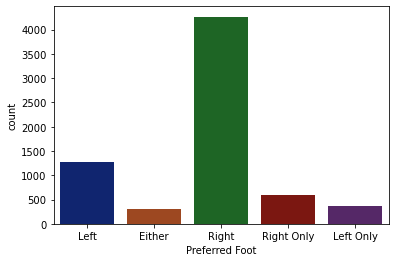

In [57]:
sns.countplot(df['Preferred Foot'], palette='dark')

<AxesSubplot:title={'center':'Goalkeepers Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

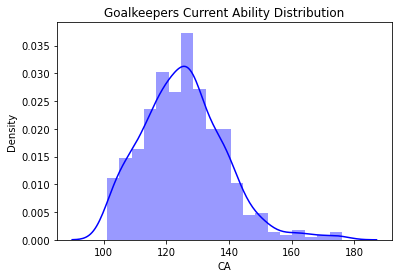

In [58]:
plt.title("Goalkeepers Current Ability Distribution")
sns.distplot(goalkeepers_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Defenders Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

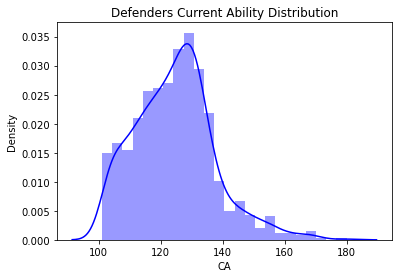

In [59]:
plt.title("Defenders Current Ability Distribution")
sns.distplot(defenders_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Backs Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

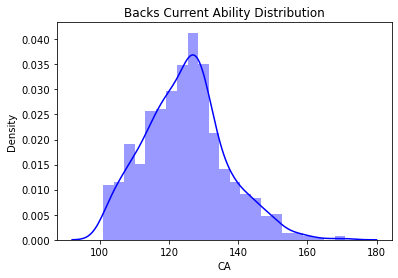

In [60]:
plt.title("Backs Current Ability Distribution")
sns.distplot(backs_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Midfielders Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

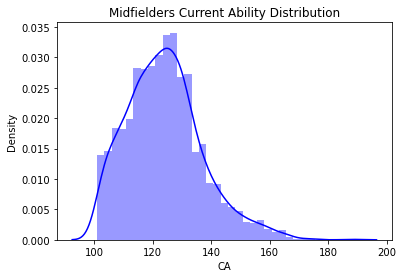

In [61]:
plt.title("Midfielders Current Ability Distribution")
sns.distplot(midfielders_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Forwards Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

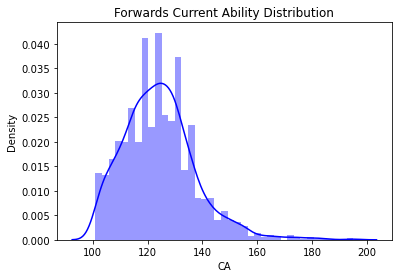

In [62]:
plt.title("Forwards Current Ability Distribution")
sns.distplot(forwards_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Goalkeepers Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

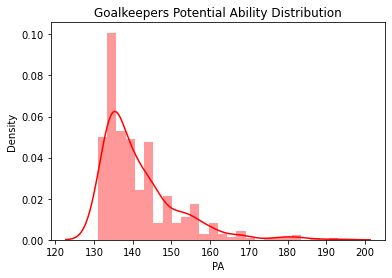

In [63]:
plt.title("Goalkeepers Potential Ability Distribution")
sns.distplot(goalkeepers_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Defenders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

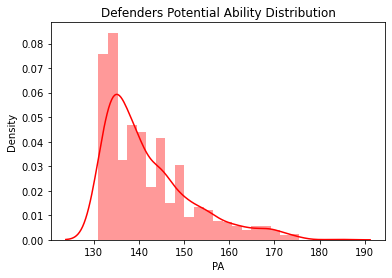

In [64]:
plt.title("Defenders Potential Ability Distribution")
sns.distplot(defenders_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Backs Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

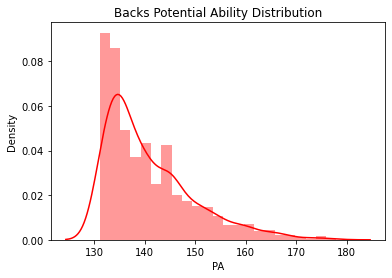

In [65]:
plt.title("Backs Potential Ability Distribution")
sns.distplot(backs_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Midfielders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

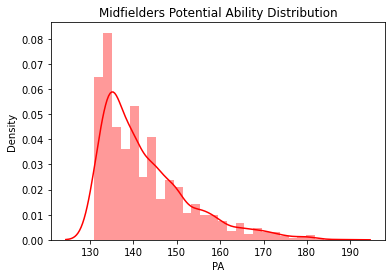

In [66]:
plt.title("Midfielders Potential Ability Distribution")
sns.distplot(midfielders_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Forwards Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

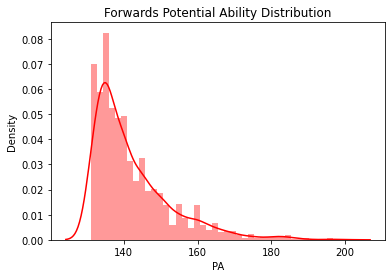

In [67]:
plt.title("Forwards Potential Ability Distribution")
sns.distplot(forwards_model.PA, color = 'Red')

In [68]:
goalkeepers_model.shape

(570, 42)

In [69]:
defenders_model.shape

(1056, 44)

In [70]:
backs_model.shape

(907, 44)

In [71]:
midfielders_model.shape

(2008, 44)

In [72]:
forwards_model.shape

(2267, 42)

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,6808.0,181.048325,6.918794,156.0,176.0,181.0,186.0,202.0
Weight,6808.0,75.153496,7.185598,55.0,70.0,75.0,80.0,103.0
Age,6808.0,26.009401,5.139988,14.0,22.0,25.0,30.0,46.0
CA,6808.0,124.369859,12.900705,101.0,115.0,124.0,131.0,195.0
PA,6808.0,142.066833,9.989804,131.0,135.0,139.0,146.0,200.0
Wor,6808.0,12.890276,2.360397,1.0,12.0,13.0,14.0,20.0
Vis,6808.0,11.425676,2.424303,1.0,10.0,12.0,13.0,20.0
Thr,6808.0,2.923766,3.019778,1.0,1.0,2.0,3.0,19.0
Tec,6808.0,12.413925,2.336078,1.0,11.0,13.0,14.0,20.0
Tea,6808.0,12.643801,2.299878,2.0,11.0,13.0,14.0,20.0


[Text(0.5, 1.0, 'Correlation Matrix')]

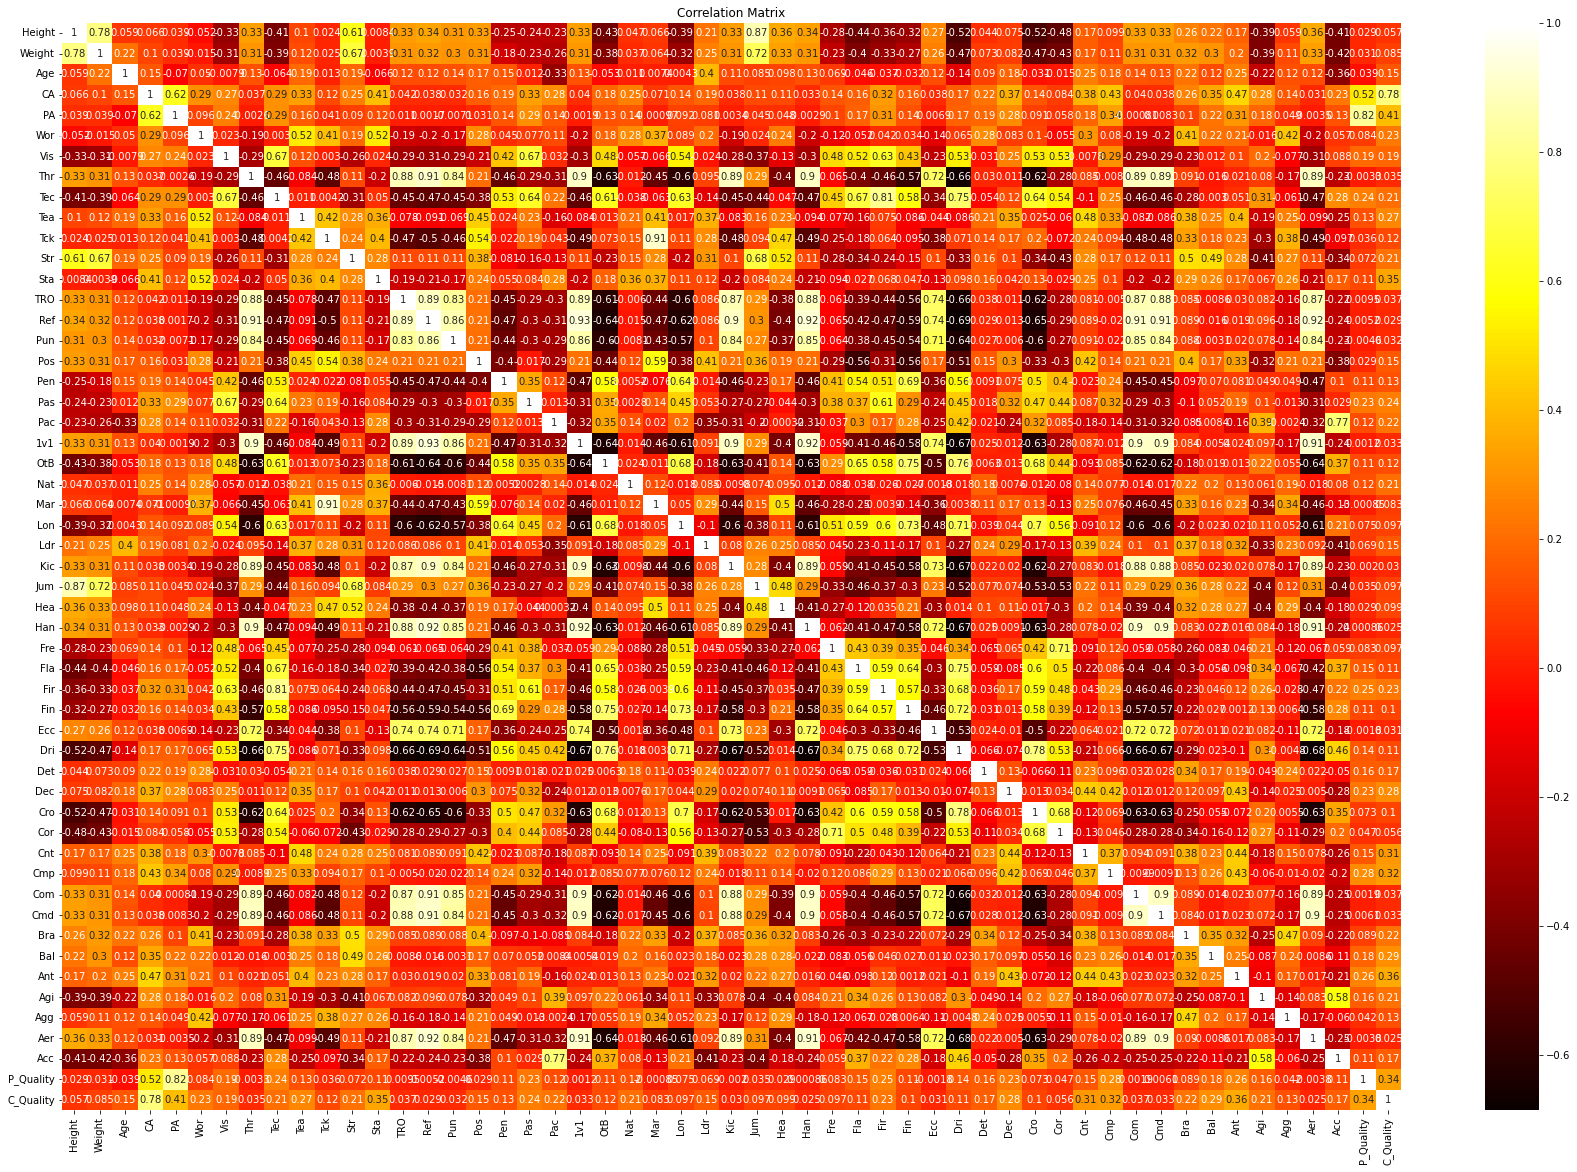

In [74]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

In [75]:
forwards.corr()["P_Quality"].sort_values()

Pos         -0.074722
Age         -0.021437
Hea         -0.008494
Jum          0.003890
Weight       0.012441
Agg          0.014768
Height       0.019649
Str          0.031997
Bra          0.046843
Wor          0.057140
Cor          0.069439
Sta          0.070488
Ldr          0.082469
Tea          0.085215
Nat          0.090999
Cnt          0.120132
Cro          0.127079
Fre          0.134523
Det          0.150374
Pen          0.157316
Pac          0.163259
Lon          0.166810
Bal          0.169009
Acc          0.170182
Agi          0.191817
Dec          0.209082
Fin          0.224829
Vis          0.233388
Ant          0.250593
Fla          0.265352
Pas          0.267911
OtB          0.273276
Cmp          0.274821
Dri          0.295754
C_Quality    0.328838
Fir          0.352788
Tec          0.362397
CA           0.515703
PA           0.819327
P_Quality    1.000000
Name: P_Quality, dtype: float64

<AxesSubplot:title={'center':'Potential Ability'}, xlabel='P_Quality', ylabel='count'>

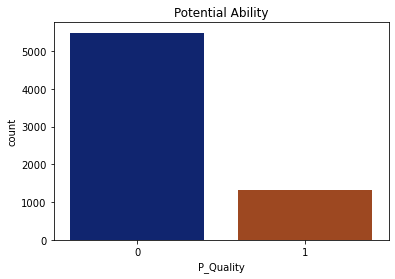

In [76]:
plt.title("Potential Ability")
sns.countplot(df["P_Quality"], palette='dark')

<AxesSubplot:title={'center':'Current Ability'}, xlabel='C_Quality', ylabel='count'>

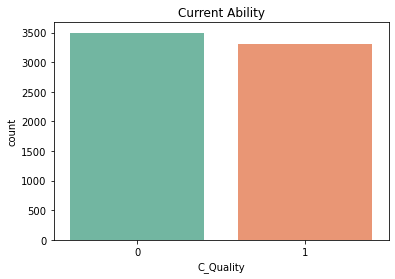

In [77]:
plt.title("Current Ability")
sns.countplot(df["C_Quality"], palette='Set2')

In [78]:
df.groupby("P_Quality").mean()

,Height,Weight,Age,CA,PA,Wor,Vis,Thr,Tec,Tea,...,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,C_Quality
P_Quality,,,,,,,,,,,,,,,,,,,,,
0,180.948222,75.045397,26.106655,121.100456,138.058341,12.792707,11.195442,2.928715,12.135460,12.497903,...,2.960802,2.941294,12.256153,12.073108,12.241933,12.458706,11.511577,3.040292,12.498086,0.403282
1,181.463341,75.601663,25.606198,137.924414,158.685563,13.294785,12.380197,2.903250,13.568405,13.248677,...,2.975057,2.987150,12.854119,13.076342,13.437642,13.239607,11.834467,3.009826,13.094482,0.829932


In [79]:
df.groupby("C_Quality").mean()

,Height,Weight,Age,CA,PA,Wor,Vis,Thr,Tec,Tea,...,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality
C_Quality,,,,,,,,,,,,,,,,,,,,,
0,180.664380,74.560034,25.261006,114.624643,138.130074,12.351915,10.981990,2.821898,11.943396,12.045455,...,2.853917,2.855060,11.813608,11.660377,11.841052,12.20669,11.192967,2.955975,12.261864,0.064322
1,181.454079,75.780665,26.800302,134.668580,146.227190,13.459215,11.894562,3.031420,12.911178,13.276133,...,3.079456,3.050755,12.962840,12.910272,13.143505,13.03716,11.977341,3.117221,12.986103,0.331722


# Model

## Forwards

In [80]:
for i in range(len(forwards_model)):
    if forwards_model["CA"][i]>=125:
        forwards_model["C_Quality"][i]=1
    else:
        forwards_model["C_Quality"][i]=0



for i in range(len(forwards_model)):
    if forwards_model["PA"][i]>=150:
        forwards_model["P_Quality"][i]=1
    else:
        forwards_model["P_Quality"][i]=0

<AxesSubplot:title={'center':'Forwards Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

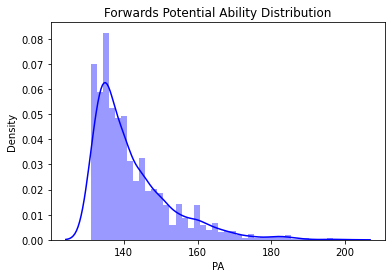

In [81]:
plt.title("Forwards Potential Ability Distribution")
sns.distplot(forwards_model.PA, color = 'Blue')

In [82]:
forwards_model.sample(7)

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Str,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
485,170,66,22,128,148,11,15,16,12,9,...,10,14,11,12,14,12,0,1,1,0
790,184,79,26,134,143,12,10,12,13,13,...,13,11,16,13,10,11,0,1,0,1
1915,186,79,27,118,133,11,12,15,9,14,...,12,15,9,13,12,13,0,0,1,0
668,185,79,21,125,145,13,11,13,11,10,...,11,13,13,10,8,11,0,1,0,1
1879,173,70,24,127,134,13,11,14,13,10,...,10,10,12,13,12,15,0,1,1,0
955,175,72,28,110,140,12,13,14,11,8,...,16,12,10,13,17,12,0,0,0,1
512,186,79,17,103,148,13,7,14,10,14,...,8,14,8,15,14,12,0,0,1,0


In [83]:
forwards_model.columns

Index(['Height', 'Weight', 'Age', 'CA', 'PA', 'Wor', 'Vis', 'Tec', 'Tea',
       'Str', 'Sta', 'Pos', 'Pen', 'Pas', 'Pac', 'OtB', 'Nat', 'Lon', 'Ldr',
       'Jum', 'Hea', 'Fre', 'Fla', 'Fir', 'Fin', 'Dri', 'Det', 'Dec', 'Cro',
       'Cor', 'Cnt', 'Cmp', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Acc',
       'P_Quality', 'C_Quality', 'Preferred Foot_Left',
       'Preferred Foot_Right'],
      dtype='object')

In [84]:
x_forwards = forwards_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_forwards_p =forwards_model["P_Quality"]

In [85]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_forwards, y_forwards_p, test_size=0.33, random_state=10)

In [86]:
x_forwards_reg = forwards_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])

#### Forwards

##### Cat Boost Classifier

In [87]:
cb_forwards_p = CatBoostClassifier(verbose=False)
cb_forwards_p.fit(x_train_p, y_train_p)

In [88]:
cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p)

In [89]:
cb_forwards_p_cm = confusion_matrix(y_test_p, cb_forwards_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[574  16]
 [ 70  89]]


In [90]:
target_names=["Low Level", "High Level"]
print(classification_report(y_test_p, cb_forwards_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.89      0.97      0.93       590
  High Level       0.85      0.56      0.67       159

    accuracy                           0.89       749
   macro avg       0.87      0.77      0.80       749
weighted avg       0.88      0.89      0.88       749



In [91]:
'''
max_f1=0
best_i=0
for i in range(0,100):
    
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_forwards, y_forwards_p, test_size=0.33, random_state=i)
    cb_forwards_p = CatBoostClassifier(verbose=False)
    cb_forwards_p.fit(x_train_p, y_train_p)
    cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p)
    
    cb_forwards_p_cm = confusion_matrix(y_test_p, cb_forwards_p_predicts)
    p=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[0][1]+cb_forwards_p_cm[1][1]))
    r=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[1][0]+cb_forwards_p_cm[1][1]))
    f1=(2*p*r)/(p+r)
    if f1>max_f1:
        max_f1=f1
        best_i=i
        
print("Best f1 score for class 1:",max_f1, "\nbest random state.", best_i)
'''

'\nmax_f1=0\nbest_i=0\nfor i in range(0,100):\n    \n    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_forwards, y_forwards_p, test_size=0.33, random_state=i)\n    cb_forwards_p = CatBoostClassifier(verbose=False)\n    cb_forwards_p.fit(x_train_p, y_train_p)\n    cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p)\n    \n    cb_forwards_p_cm = confusion_matrix(y_test_p, cb_forwards_p_predicts)\n    p=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[0][1]+cb_forwards_p_cm[1][1]))\n    r=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[1][0]+cb_forwards_p_cm[1][1]))\n    f1=(2*p*r)/(p+r)\n    if f1>max_f1:\n        max_f1=f1\n        best_i=i\n        \nprint("Best f1 score for class 1:",max_f1, "\nbest random state.", best_i)\n'

* Precision-Recall Curve

In [92]:
cb_forwards_p_class1_probs = cb_forwards_p.predict_proba(x_test_p)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_thresh_predicts = cb_forwards_p_class1_probs > threshold
    precision = precision_score(y_test_p, cb_forwards_p_thresh_predicts)
    recall = recall_score(y_test_p, cb_forwards_p_thresh_predicts)
    f1 = f1_score(y_test_p, cb_forwards_p_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.212, Completeness = 1.000 | F1 = 0.350
Threshold = 0.01 | Accuracy = 0.221, Completeness = 0.987 | F1 = 0.361
Threshold = 0.02 | Accuracy = 0.252, Completeness = 0.981 | F1 = 0.401
Threshold = 0.03 | Accuracy = 0.281, Completeness = 0.975 | F1 = 0.436
Threshold = 0.04 | Accuracy = 0.302, Completeness = 0.925 | F1 = 0.456
Threshold = 0.05 | Accuracy = 0.332, Completeness = 0.912 | F1 = 0.487
Threshold = 0.06 | Accuracy = 0.355, Completeness = 0.899 | F1 = 0.509
Threshold = 0.07 | Accuracy = 0.376, Completeness = 0.881 | F1 = 0.527
Threshold = 0.08 | Accuracy = 0.411, Completeness = 0.881 | F1 = 0.560
Threshold = 0.09 | Accuracy = 0.429, Completeness = 0.868 | F1 = 0.574
Threshold = 0.10 | Accuracy = 0.450, Completeness = 0.849 | F1 = 0.588
Threshold = 0.11 | Accuracy = 0.487, Completeness = 0.849 | F1 = 0.619
Threshold = 0.12 | Accuracy = 0.506, Completeness = 0.836 | F1 = 0.630
Threshold = 0.13 | Accuracy = 0.520, Completeness = 0.811 | F1 = 0.634
Thresh

In [93]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_thresh_predicts = cb_forwards_p_class1_probs > threshold
    f1 = f1_score(y_test_p, cb_forwards_p_thresh_predicts)
    if f1_list.max() == f1:
        cb_forwards_p_best_threshold = threshold

print("Maximum f1 score for p quality is: %.3f" % f1_list.max(),"and best threshold is:", cb_forwards_p_best_threshold)

Maximum f1 score for p quality is: 0.698 and best threshold is: 0.44


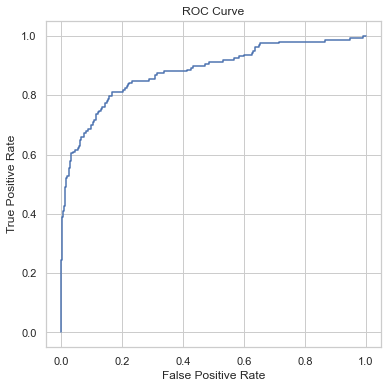

In [94]:
fpr, tpr, _ = metrics.roc_curve(y_test_p,  cb_forwards_p_class1_probs)

plt.figure(figsize=(6,6))
sns.set_theme(style= "whitegrid")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.show()

In [95]:
print('CatBoost Classifier AUC score: %.3f' % average_precision_score(y_test_p, cb_forwards_p_class1_probs)) 

CatBoost Classifier AUC score: 0.781


In [96]:
def custom_predict(X, threshold):
    
    return (cb_forwards_p_class1_probs > threshold).astype(int)
    
    
cb_forwards_p_thresh_predicts = custom_predict(X = x_test_p, threshold = cb_forwards_p_best_threshold) 

In [97]:
cb_forwards_p_thresh_cm= confusion_matrix(y_test_p, cb_forwards_p_thresh_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_thresh_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[570  20]
 [ 63  96]]


In [98]:
print(classification_report(y_test_p, cb_forwards_p_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.90      0.97      0.93       590
  High Level       0.83      0.60      0.70       159

    accuracy                           0.89       749
   macro avg       0.86      0.78      0.82       749
weighted avg       0.89      0.89      0.88       749



In [99]:
print("CatBoost Classifier Brier Score:",brier_score_loss(y_test_p, cb_forwards_p_class1_probs))

CatBoost Classifier Brier Score: 0.09038827972021522


* Model Tuning

In [100]:
'''
cb_forwards_p_prmt = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }
'''

"\ncb_forwards_p_prmt = {\n    'iterations': [200,500],\n    'learning_rate': [0.01,0.05, 0.1],\n    'depth': [3,5,8] }\n"

In [101]:
'''
cb_forwards_p_cv_model = GridSearchCV(cb_forwards_p, 
                           cb_forwards_p_prmt, 
                           cv = 10, 
                            n_jobs = -1)
'''

'\ncb_forwards_p_cv_model = GridSearchCV(cb_forwards_p, \n                           cb_forwards_p_prmt, \n                           cv = 10, \n                            n_jobs = -1)\n'

In [102]:
#cb_forwards_p_cv_model.fit(x_train_p, y_train_p)

In [103]:
#print("Best parameters:", cb_forwards_p_cv_model.best_params_)
#Best parameters: {'depth': 5, 'iterations': 500, 'learning_rate': 0.05}

In [104]:
cb_forwards_p_tuned= CatBoostClassifier(iterations=500, 
                       learning_rate=0.05,
                       depth=5, verbose=False)

cb_forwards_p_tuned.fit(x_train_p, y_train_p)

In [105]:
cb_forwards_p_tuned_predicts= cb_forwards_p_tuned.predict(x_test_p)

cb_forwards_p_tuned_cm = confusion_matrix(y_test_p, cb_forwards_p_tuned_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_tuned_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[566  24]
 [ 69  90]]


In [106]:
print(classification_report(y_test_p, cb_forwards_p_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.89      0.96      0.92       590
  High Level       0.79      0.57      0.66       159

    accuracy                           0.88       749
   macro avg       0.84      0.76      0.79       749
weighted avg       0.87      0.88      0.87       749



* Final Model

In [107]:
cb_forwards_p_class1_probs_tuned= cb_forwards_p_tuned.predict_proba(x_test_p)[:, 1]

f1_list = []
for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_tuned_thres_predicts = cb_forwards_p_class1_probs_tuned > threshold
    precision = precision_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    recall = recall_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    f1 = f1_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.212, Completeness = 1.000 | F1 = 0.350
Threshold = 0.01 | Accuracy = 0.253, Completeness = 0.981 | F1 = 0.403
Threshold = 0.02 | Accuracy = 0.290, Completeness = 0.925 | F1 = 0.441
Threshold = 0.03 | Accuracy = 0.324, Completeness = 0.906 | F1 = 0.477
Threshold = 0.04 | Accuracy = 0.352, Completeness = 0.893 | F1 = 0.505
Threshold = 0.05 | Accuracy = 0.382, Completeness = 0.874 | F1 = 0.532
Threshold = 0.06 | Accuracy = 0.413, Completeness = 0.862 | F1 = 0.558
Threshold = 0.07 | Accuracy = 0.431, Completeness = 0.849 | F1 = 0.572
Threshold = 0.08 | Accuracy = 0.460, Completeness = 0.830 | F1 = 0.592
Threshold = 0.09 | Accuracy = 0.489, Completeness = 0.830 | F1 = 0.615
Threshold = 0.10 | Accuracy = 0.510, Completeness = 0.824 | F1 = 0.630
Threshold = 0.11 | Accuracy = 0.533, Completeness = 0.824 | F1 = 0.647
Threshold = 0.12 | Accuracy = 0.541, Completeness = 0.824 | F1 = 0.653
Threshold = 0.13 | Accuracy = 0.561, Completeness = 0.811 | F1 = 0.663
Thresh

In [108]:
f1_list = np.asarray(f1_list)
f1_list.max()

for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_tuned_thres_predicts = cb_forwards_p_class1_probs_tuned > threshold
    f1 = f1_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    if f1_list.max() == f1:
        cb_forwards_p_tuned_best_threshold = threshold


print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_forwards_p_tuned_best_threshold)

Maximum f1 score is: 0.686 and best threshold is: 0.31


* Precision-Recall Curve

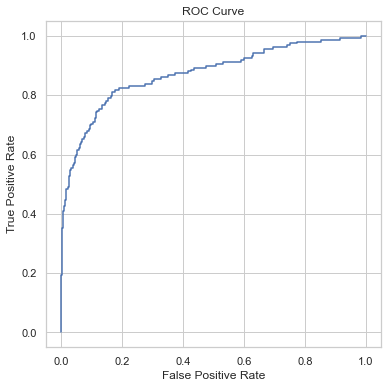

In [109]:
fpr, tpr, _ = metrics.roc_curve(y_test_p,  cb_forwards_p_class1_probs_tuned)

plt.figure(figsize=(6,6))
sns.set_theme(style= "whitegrid")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.show()

In [110]:
print('Tuned CatBoost Classifier P Quality AUC Score: %.3f' % average_precision_score(y_test_p, cb_forwards_p_class1_probs_tuned)) 

Tuned CatBoost Classifier P Quality AUC Score: 0.767


In [111]:
def custom_predict(X, threshold):

    return (cb_forwards_p_class1_probs_tuned > threshold).astype(int)
    
    
cb_forwards_p_tuned_thres_predicts = custom_predict(X=x_test_p, threshold = cb_forwards_p_tuned_best_threshold) 

In [112]:
cb_forwards_p_tuned_cm = confusion_matrix(y_test_p, cb_forwards_p_tuned_thres_predicts)
print("\nTuned CatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_tuned_cm)


Tuned CatBoost Classifier P Quality Confusion Matrix:

[[544  46]
 [ 52 107]]


In [113]:
print(classification_report(y_test_p, cb_forwards_p_tuned_thres_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.91      0.92      0.92       590
  High Level       0.70      0.67      0.69       159

    accuracy                           0.87       749
   macro avg       0.81      0.80      0.80       749
weighted avg       0.87      0.87      0.87       749



In [114]:
print("CatBoost Classifier Brier Score:",brier_score_loss(y_test_p, cb_forwards_p_class1_probs_tuned))

CatBoost Classifier Brier Score: 0.09295031215106221


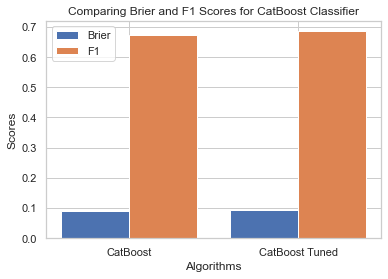

In [115]:
brier_scores = [brier_score_loss(y_test_p, cb_forwards_p_class1_probs), brier_score_loss(y_test_p, cb_forwards_p_class1_probs_tuned)]
f1_scores =[f1_score(y_test_p, cb_forwards_p_predicts), f1_score(y_test_p, cb_forwards_p_tuned_thres_predicts)]
X = ['CatBoost','CatBoost Tuned']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, brier_scores, 0.4, label = 'Brier')
plt.bar(X_axis + 0.2, f1_scores, 0.4, label = 'F1')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparing Brier and F1 Scores for CatBoost Classifier")
plt.legend()
plt.show()

##### GBC Regression

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
forwards_model_reg_P = forwards_model[forwards_model["PA"]>=150]

In [117]:
'''
Preferred Foot_Right   -0.048510
Pos                    -0.044563
Age                    -0.019777
Height                  0.009593
Wor                     0.009948
Agg                     0.028956
Jum                     0.036758
Weight                  0.037327
Tea                     0.049599
Bra                     0.089329
Cor                     0.096020
Str                     0.099695
'''

x_forwards_reg = forwards_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality", "Preferred Foot_Right", "Weight",
                                                   "Wor"])
y_forwards_P = forwards_model_reg_P["PA"]
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_forwards_reg, y_forwards_P, test_size=0.33, random_state=108)

In [118]:
gbc_forwards_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)

In [119]:
gbc_forwards_P_predicts = gbc_forwards_P.predict(x_test_P)

In [120]:
metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts)

4.55350632395326

In [121]:
'''
for i in range (0,1000):
    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_forwards_reg, y_forwards_P, test_size=0.33, random_state=i)
    gbc_forwards_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)
    gbc_forwards_P_predicts = gbc_forwards_P.predict(x_test_P)
    
    if metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts)<4.65:
        print(metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts), i)

'''

'\nfor i in range (0,1000):\n    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_forwards_reg, y_forwards_P, test_size=0.33, random_state=i)\n    gbc_forwards_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)\n    gbc_forwards_P_predicts = gbc_forwards_P.predict(x_test_P)\n    \n    if metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts)<4.65:\n        print(metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts), i)\n\n'

##### Custom Prediction

In [122]:
differences = y_test_P- gbc_forwards_P_predicts

<AxesSubplot:xlabel='PA', ylabel='Density'>

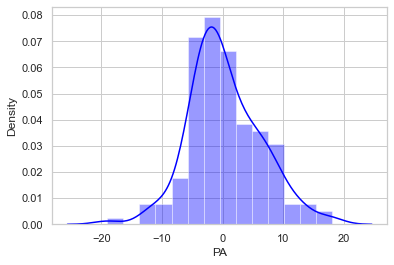

In [123]:
sns.distplot(differences, color = 'Blue')

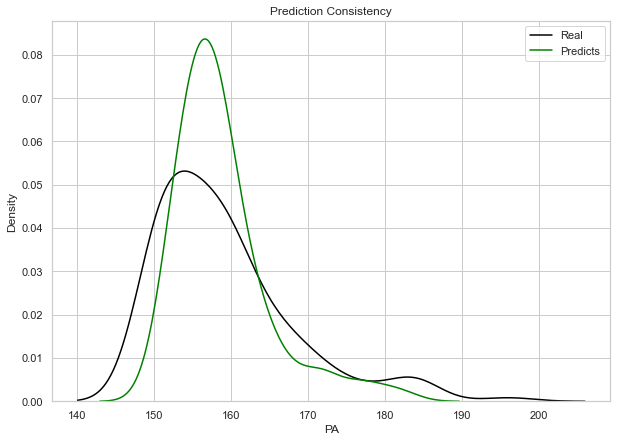

In [124]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(gbc_forwards_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA', ylabel='PA'>

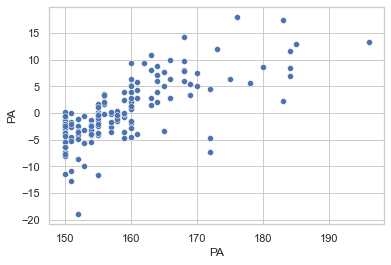

In [125]:
sns.scatterplot(forwards_model_reg_P.PA, differences)

In [126]:
df_errors = forwards.iloc[0:448,:]

In [127]:
df_errors = df_errors.loc[x_test_P.index]

In [128]:
df_errors["Errors"] = differences

In [129]:
df_errors["Predictions"] = gbc_forwards_P_predicts

In [130]:
df_errors

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Errors,Predictions
352,Simone Verdi,Torino,Italian Serie A,173,63,26,Either,AM (R),143,152,...,11,13,12,15,13,14,1,1,-1.164285,153.164285
245,Roberto Pereyra,Watford,Sky Bet Championship,182,77,28,Right,M (L),141,156,...,7,12,13,14,11,14,1,1,3.213129,152.786871
144,IÃ±aki Williams,A. Bilbao,Spanish First Division,186,79,25,Right,AM (R),154,161,...,15,11,12,12,10,16,1,1,5.887030,155.112970
100,Rodrigo,Leeds,English Premier Division,182,77,28,Left,ST (C),154,165,...,12,13,16,16,12,17,1,1,-3.370811,168.370811
84,Giuseppe Rossi,Real Salt Lake,Major League Soccer,173,72,32,Left,ST (C),114,166,...,11,9,13,13,8,12,1,0,2.760860,163.239140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,BalÃ¡zs DzsudzsÃ¡k,Al-Ittihad (UAE),UAE Professional League,179,72,32,Either,AM (L),135,151,...,4,12,13,14,8,14,1,1,-2.565883,153.565883
172,Moussa Diaby,Bayer 04,Bundesliga,170,65,19,Left,M (L),145,160,...,10,14,11,16,10,17,1,1,-1.425541,161.425541
164,Eduardo,Unknown,Unknown,178,71,36,Left,ST (C),105,160,...,11,5,8,8,8,8,1,0,0.687418,159.312582
13,Sadio ManÃ©,Liverpool,English Premier Division,175,69,27,Right,AM (L),179,184,...,12,16,16,16,10,18,1,1,11.668645,172.331355


In [162]:
for i in range(len(forwards_model_reg_P)):
    if forwards_model_reg_P["PA"][i]>=165:
        forwards_model_reg_P["P_Quality"][i]=1
    else:
        forwards_model_reg_P["P_Quality"][i]=0

In [163]:
'''
Pos         -0.074722
Age         -0.021437
Hea         -0.008494
Jum          0.003890
'''
x_forwards_reg = forwards_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality", "Age", "Hea", "Jum"])
y_forwards_p = forwards_model_reg_P["P_Quality"]
x_train_p_2, x_test_p_2, y_train_p_2, y_test_p_2 = train_test_split(x_forwards_reg, y_forwards_p, test_size=0.33, random_state=108)

In [164]:
from catboost import CatBoostClassifier
cb_forwards_p = CatBoostClassifier(verbose=False)
cb_forwards_p.fit(x_train_p_2, y_train_p_2)

In [165]:
cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p_2)

In [166]:
cb_forwards_p_cm = confusion_matrix(y_test_p_2, cb_forwards_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[117   1]
 [ 18  12]]


In [167]:
target_names=["Low Level", "High Level"]
print(classification_report(y_test_p_2, cb_forwards_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.87      0.99      0.92       118
  High Level       0.92      0.40      0.56        30

    accuracy                           0.87       148
   macro avg       0.89      0.70      0.74       148
weighted avg       0.88      0.87      0.85       148



In [168]:
df_errors["Pa_>=165"]=cb_forwards_p.predict(x_test_p_2)

In [169]:
metrics.mean_absolute_error(df_errors[df_errors["Pa_>=165"]==1].PA, df_errors[df_errors["Pa_>=165"]==1].Predictions+3.52)

6.145823075331422

In [170]:
df_errors["New_predictions"] = df_errors.Predictions

In [171]:
for i in range(len(x_test_p_2)):
    if cb_forwards_p.predict(x_test_p_2.iloc[i:i+1])==1:
        df_errors.at[x_test_p_2.index[i],'New_predictions']=df_errors.loc[x_test_p_2.index[i]].Predictions+3.52

In [172]:
df_errors[df_errors["Pa_>=165"]==1]

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Errors,Predictions,Pa_>=165,New_predictions
100,Rodrigo,Leeds,English Premier Division,182,77,28,Left,ST (C),154,165,...,16,16,12,17,1,1,-3.370811,168.370811,1,171.890811
35,Lautaro MartÃ­nez,Inter,Italian Serie A,174,79,21,Right,ST (C),161,175,...,15,16,17,15,1,1,6.375511,168.624489,1,172.144489
11,Mohamed Salah,Liverpool,English Premier Division,175,72,27,Left,AM (R),179,184,...,16,16,10,18,1,1,6.939118,177.060882,1,180.580882
29,Karim Benzema,R. Madrid,Spanish First Division,185,82,31,Either,ST (C),174,178,...,14,14,7,15,1,1,5.630376,172.369624,1,175.889624
12,Robert Lewandowski,FC Bayern,Bundesliga,184,78,30,Right,ST (C),184,184,...,15,13,18,14,1,1,8.401589,175.598411,1,179.118411
49,Son Heung-Min,Tottenham,English Premier Division,183,77,26,Either,AM (L),172,172,...,16,15,8,16,1,1,-4.595200,176.595200,1,180.115200
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,17,16,6,20,1,1,13.212828,182.787172,1,186.307172
350,Sebastian Giovinco,Al-Hilal (KSA),Saudi Professional League,163,61,32,Either,ST (C),144,152,...,14,18,10,15,1,1,-8.620627,160.620627,1,164.140627
7,Antoine Griezmann,Barcelona,Spanish First Division,175,71,28,Left,ST (C),171,185,...,15,15,13,15,1,1,12.969007,172.030993,1,175.550993
15,Sergio AgÃ¼ero,Man City,English Premier Division,172,74,31,Either,ST (C),178,183,...,16,18,14,17,1,1,2.214669,180.785331,1,184.305331


In [173]:
differences2= y_test_P-df_errors.New_predictions

<AxesSubplot:ylabel='Density'>

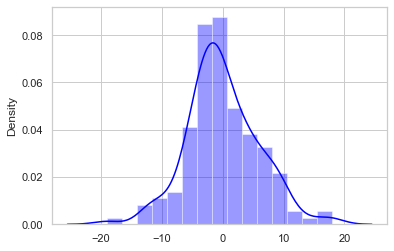

In [174]:
sns.distplot(differences2, color = 'Blue')

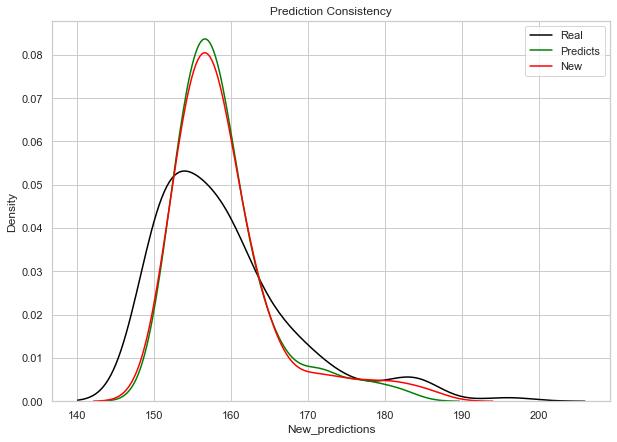

In [175]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(gbc_forwards_P_predicts, hist=False, color='green', label='Predicts')
sns.distplot(df_errors.New_predictions, hist=False, color='Red', label='New')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA'>

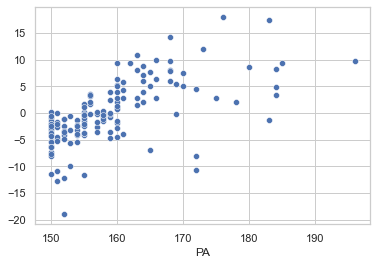

In [176]:
sns.scatterplot(forwards_model_reg_P.PA, differences2)

<AxesSubplot:xlabel='PA', ylabel='PA'>

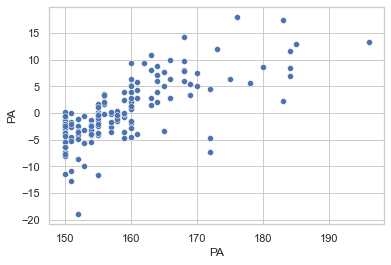

In [177]:
sns.scatterplot(forwards_model_reg_P.PA, differences)

In [178]:
metrics.mean_absolute_error(y_test_P, df_errors.New_predictions)

4.454274980371579